In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

# 1. Data Exploration

In [2]:
df = pd.read_csv('dataset.csv')
df

C:\Users\MSI-NB\AppData\Local\Temp\ipykernel_16284\1172849257.py:1: DtypeWarning: Columns (3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('dataset.csv')


,id,spkid,full_name,pdes,name,prefix,neo,pha,H,diameter,...,sigma_i,sigma_om,sigma_w,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,class,rms
0,a0000001,2000001,1 Ceres,1,Ceres,NaN,N,N,3.400,939.400,...,4.608900e-09,6.168800e-08,6.624800e-08,7.820700e-09,1.111300e-11,1.196500e-12,3.782900e-08,9.415900e-09,MBA,0.43301
1,a0000002,2000002,2 Pallas,2,Pallas,NaN,N,N,4.200,545.000,...,3.469400e-06,6.272400e-06,9.128200e-06,8.859100e-06,4.961300e-09,4.653600e-10,4.078700e-05,3.680700e-06,MBA,0.35936
2,a0000003,2000003,3 Juno,3,Juno,NaN,N,N,5.330,246.596,...,3.223100e-06,1.664600e-05,1.772100e-05,8.110400e-06,4.363900e-09,4.413400e-10,3.528800e-05,3.107200e-06,MBA,0.33848
3,a0000004,2000004,4 Vesta,4,Vesta,NaN,N,N,3.000,525.400,...,2.170600e-07,3.880800e-07,1.789300e-07,1.206800e-06,1.648600e-09,2.612500e-10,4.103700e-06,1.274900e-06,MBA,0.39980
4,a0000005,2000005,5 Astraea,5,Astraea,NaN,N,N,6.900,106.699,...,2.740800e-06,2.894900e-05,2.984200e-05,8.303800e-06,4.729000e-09,5.522700e-10,3.474300e-05,3.490500e-06,MBA,0.52191
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
958519,bPLS6013,3246801,(6013 P-L),6013 P-L,NaN,NaN,N,N,17.135,NaN,...,6.969000e+00,7.433000e+00,4.631100e+01,2.738300e+01,1.041200e+00,1.652100e-01,1.309700e+02,7.264900e+02,MBA,0.23839
958520,bPLS6331,3246834,(6331 P-L),6331 P-L,NaN,NaN,N,N,18.500,NaN,...,1.563500e-05,5.598600e-05,2.380400e-04,1.298200e-04,2.418900e-08,3.346100e-09,4.690200e-04,1.578500e-05,MBA,0.53633
958521,bPLS6344,3013075,(6344 P-L),6344 P-L,NaN,NaN,Y,Y,20.400,NaN,...,1.853300e-05,5.691700e-05,8.969200e-05,5.272600e-05,1.650100e-07,1.101600e-08,2.830600e-04,9.127500e-05,APO,0.51556
958522,bT2S2060,3246457,(2060 T-2),2060 T-2,NaN,NaN,N,N,18.071,NaN,...,5.448800e-01,4.391600e+00,1.898800e+01,1.083800e+01,7.171600e-01,1.016700e-01,3.898400e+01,5.035500e+02,MBA,0.25641


## Values Introduction

### Identification Parameters:
SPK-ID: Unique identifier used within the NASA/JPL Small-Body Database to identify celestial objects\
Object ID: Internal identifier within the database for the celestial object.\
Object fullname: Object full name/designation\
pdes: Official primary designation\
name: Official name given by the International Astronomical Union (IAU)

### Classification Flags:
NEO: Near-Earth Object (NEO) flag\
PHA: Potentially Hazardous Asteroid (PHA) flag\
PHAs are a subset of NEOs with orbits that could potentially bring them close to Earth,\
with a minimum orbit intersection distance (MOID) of less than 0.05 AU and an absolute magnitude (H) of 22 or less.

### Physical Characteristics:
H: Absolute magnitude parameter, measure of the intrinsic brightness of the object\
Diameter: Estimated diameter of the object\
Albedo: Geometric albedo represents the reflectivity of the object’s surface\
Diameter_sigma: Representing the possible range of the diameter based on observational data

Orbit_id: Identifier for the specific orbital solution\
Epoch: Specific date and time at which the orbital elements are defined\
Equinox: Reference frame used for the orbital elements\
e: Eccentricity\
a: Semi-major axis\
q: perihelion distance\
i: inclination\
tp: Time of perihelion passage\
moid_ld: Earth Minimum Orbit Intersection Distance

In [3]:
df.columns

Index(['id', 'spkid', 'full_name', 'pdes', 'name', 'prefix', 'neo', 'pha', 'H',
       'diameter', 'albedo', 'diameter_sigma', 'orbit_id', 'epoch',
       'epoch_mjd', 'epoch_cal', 'equinox', 'e', 'a', 'q', 'i', 'om', 'w',
       'ma', 'ad', 'n', 'tp', 'tp_cal', 'per', 'per_y', 'moid', 'moid_ld',
       'sigma_e', 'sigma_a', 'sigma_q', 'sigma_i', 'sigma_om', 'sigma_w',
       'sigma_ma', 'sigma_ad', 'sigma_n', 'sigma_tp', 'sigma_per', 'class',
       'rms'],
      dtype='object')

In [4]:
df.describe()

,spkid,H,diameter,albedo,diameter_sigma,epoch,epoch_mjd,epoch_cal,e,a,...,sigma_q,sigma_i,sigma_om,sigma_w,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,rms
count,9.585240e+05,952261.000000,136209.000000,135103.000000,136081.000000,9.585240e+05,958524.000000,9.585240e+05,958524.000000,958524.000000,...,9.386020e+05,9.386020e+05,9.386020e+05,9.386020e+05,9.386020e+05,9.385980e+05,9.386020e+05,9.386020e+05,9.385980e+05,958522.000000
mean,3.810114e+06,16.906411,5.506429,0.130627,0.479184,2.458869e+06,58868.781950,2.019693e+07,0.156116,2.902143,...,1.982929e+01,1.168449e+00,5.310234e+00,1.370062e+06,1.369977e+06,2.131453e+01,5.060221e-02,4.312780e+08,8.525815e+04,0.561153
std,6.831541e+06,1.790405,9.425164,0.110323,0.782895,7.016716e+02,701.671573,1.930354e+04,0.092643,39.719503,...,2.903785e+03,1.282231e+02,1.333381e+03,9.158996e+08,9.158991e+08,7.197034e+03,9.814953e+00,2.953046e+11,2.767681e+07,2.745700
min,2.000001e+06,-1.100000,0.002500,0.001000,0.000500,2.425052e+06,25051.000000,1.927062e+07,0.000000,-14702.447872,...,1.956900e-11,4.608900e-09,6.168800e-08,6.624800e-08,7.820700e-09,1.111300e-11,1.196500e-12,3.782900e-08,9.415900e-09,0.000000
25%,2.239632e+06,16.100000,2.780000,0.053000,0.180000,2.459000e+06,59000.000000,2.020053e+07,0.092193,2.387835,...,1.462000e-07,6.095900e-06,3.619400e-05,5.755000e-05,2.573700e-05,2.340900e-08,2.768800e-09,1.110900e-04,1.794500e-05,0.518040
50%,2.479262e+06,16.900000,3.972000,0.079000,0.332000,2.459000e+06,59000.000000,2.020053e+07,0.145002,2.646969,...,2.271900e-07,8.688800e-06,6.642550e-05,1.047100e-04,4.900100e-05,4.359000e-08,4.638000e-09,2.230800e-04,3.501700e-05,0.566280
75%,3.752518e+06,17.714000,5.765000,0.190000,0.620000,2.459000e+06,59000.000000,2.020053e+07,0.200650,3.001932,...,6.583200e-07,1.591500e-05,1.609775e-04,3.114400e-04,1.718900e-04,1.196600e-07,1.124000e-08,8.139600e-04,9.775475e-05,0.613927
max,5.401723e+07,33.200000,939.400000,1.000000,140.000000,2.459000e+06,59000.000000,2.020053e+07,1.855356,33488.895955,...,1.015000e+06,5.533000e+04,1.199100e+06,8.845100e+11,8.845100e+11,5.509700e+06,7.698800e+03,2.853100e+14,1.910700e+10,2686.600000


In [5]:
df.info()
#Check Data Types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 958524 entries, 0 to 958523
Data columns (total 45 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              958524 non-null  object 
 1   spkid           958524 non-null  int64  
 2   full_name       958524 non-null  object 
 3   pdes            958524 non-null  object 
 4   name            22064 non-null   object 
 5   prefix          18 non-null      object 
 6   neo             958520 non-null  object 
 7   pha             938603 non-null  object 
 8   H               952261 non-null  float64
 9   diameter        136209 non-null  float64
 10  albedo          135103 non-null  float64
 11  diameter_sigma  136081 non-null  float64
 12  orbit_id        958524 non-null  object 
 13  epoch           958524 non-null  float64
 14  epoch_mjd       958524 non-null  int64  
 15  epoch_cal       958524 non-null  float64
 16  equinox         958524 non-null  object 
 17  e         

In [6]:
print(df['id'].nunique())
print(df['spkid'].nunique())
print(df['full_name'].nunique())
print(df['pdes'].nunique())

958524
958524
958524
958524


In [7]:
df['pha'].value_counts(normalize=True)

pha
N    0.997799
Y    0.002201
Name: proportion, dtype: float64

In [8]:
df['neo'].value_counts(normalize=True)

neo
N    0.976114
Y    0.023886
Name: proportion, dtype: float64

In [9]:
print(df['orbit_id'].unique())
print(df['orbit_id'].nunique())

['JPL 47' 'JPL 37' 'JPL 112' ... 'E2020H77' 'E2020K86' 'E2020J48']
4690


In [10]:
print(df['prefix'].unique())
print(df['prefix'].nunique())

[nan 'A']
1


In [11]:
print(df['equinox'].unique())
print(df['equinox'].nunique())

['J2000']
1


In [12]:
print(df['class'].unique())
print(df['class'].nunique())

['MBA' 'OMB' 'MCA' 'AMO' 'IMB' 'TJN' 'CEN' 'APO' 'ATE' 'AST' 'TNO' 'IEO'
 'HYA']
13


# 2. Data Cleaning

In [13]:
df = df.drop(['id', 'pdes', 'name', 'prefix', 'equinox'], axis='columns', inplace=False)

In [14]:
df.shape

(958524, 40)

In [15]:
print(df.isnull().sum())
#Identify Missing Values

spkid                  0
full_name              0
neo                    4
pha                19921
H                   6263
diameter          822315
albedo            823421
diameter_sigma    822443
orbit_id               0
epoch                  0
epoch_mjd              0
epoch_cal              0
e                      0
a                      0
q                      0
i                      0
om                     0
w                      0
ma                     1
ad                     4
n                      0
tp                     0
tp_cal                 0
per                    4
per_y                  1
moid               19921
moid_ld              127
sigma_e            19922
sigma_a            19922
sigma_q            19922
sigma_i            19922
sigma_om           19922
sigma_w            19922
sigma_ma           19922
sigma_ad           19926
sigma_n            19922
sigma_tp           19922
sigma_per          19926
class                  0
rms                    2


In [16]:
df = df[df['pha'].notna()]
df = df.drop(['diameter', 'albedo', 'diameter_sigma'], axis= 'columns')
df = df[df['H'].notna()]
df = df[df['sigma_ad'].notna()]
df = df[df['ma'].notna()]

In [17]:
df.reset_index(drop=True, inplace=True)

In [18]:
print(df.isnull().sum())

spkid        0
full_name    0
neo          0
pha          0
H            0
orbit_id     0
epoch        0
epoch_mjd    0
epoch_cal    0
e            0
a            0
q            0
i            0
om           0
w            0
ma           0
ad           0
n            0
tp           0
tp_cal       0
per          0
per_y        0
moid         0
moid_ld      0
sigma_e      0
sigma_a      0
sigma_q      0
sigma_i      0
sigma_om     0
sigma_w      0
sigma_ma     0
sigma_ad     0
sigma_n      0
sigma_tp     0
sigma_per    0
class        0
rms          0
dtype: int64


In [19]:
df.shape

(932335, 37)

df_ObjectInfo = df[['spkid', 'full_name']]\
df_ObjectInfo.to_csv('ObjectInfo.csv', index=False)

df_Classification = df[['spkid', 'neo', 'pha', 'class']]\
df_Classification.to_csv('Classification.csv', index=False)

df_PhysicalCharacteristics = df[['spkid', 'H']]\
df_PhysicalCharacteristics.to_csv('PhysicalCharacteristics.csv', index=False)

df_OrbitParameters = df[['spkid', 'orbit_id', 'epoch', 'epoch_mjd', 'epoch_cal', 'e', 'a', 'q', 'i', 'om', 'w', 'ma', 'ad', 'n', 'tp', 'tp_cal', 'per', 'per_y', 'moid', 'moid_ld', 'sigma_e', 'sigma_a', 'sigma_q', 'sigma_i', 'sigma_om', 'sigma_w', 'sigma_ma', 'sigma_ad', 'sigma_n', 'sigma_tp', 'sigma_per', 'rms']]\
df_OrbitParameters.to_csv('OrbitParameters.csv', index=False)

# 3. Hypothesis

In [20]:
df['pha'] = df['pha'].replace({'Y': 1, 'N': 0})
df['pha'].value_counts()
df['neo'] = df['neo'].replace({'Y': 1, 'N': 0})
df['neo'].value_counts()

neo
0    909452
1     22883
Name: count, dtype: int64

## Feature Importance

Feature importances: [1.15450166e-01 1.41212104e-03 6.96248507e-04 5.55336418e-04
 4.52466532e-02 5.06082338e-02 3.38474098e-01 2.94136422e-03
 1.32777946e-04 1.71428017e-04 1.17662100e-04 2.20019772e-02
 4.94103881e-02 3.50884341e-04 5.55270287e-04 2.87236709e-02
 2.59630270e-02 1.42397255e-01 1.67465079e-01 1.90018016e-04
 4.60281336e-04 5.44204507e-04 6.68751751e-04 2.39231382e-03
 8.40124811e-06 9.42639165e-06 3.07855416e-04 1.08994903e-03
 0.00000000e+00 6.11632137e-05 1.59399487e-03]


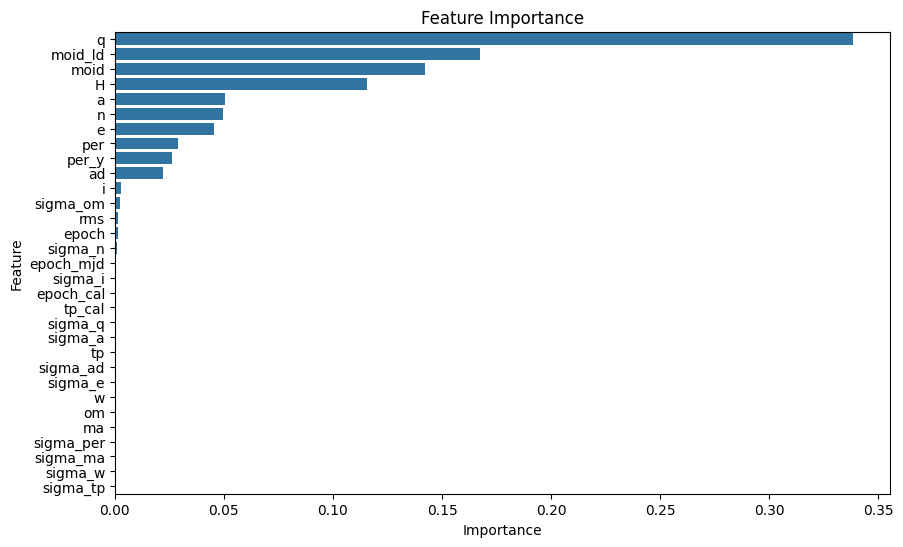

In [21]:
#Feature Importance to NEO using tree-based model - random forest
features = ['H', 'epoch', 'epoch_mjd', 'epoch_cal', 'e', 'a', 'q', 'i', 'om', 'w', 'ma', 'ad', 'n', 'tp', 'tp_cal', 'per', 'per_y', 'moid', 'moid_ld', 'sigma_e', 'sigma_a', 'sigma_q', 'sigma_i', 'sigma_om', 'sigma_w', 'sigma_ma', 'sigma_ad', 'sigma_n', 'sigma_tp', 'sigma_per', 'rms']

df.dropna(subset=features, inplace=True)

scaler = StandardScaler()
X1 = scaler.fit_transform(df[features])
y1 = df['neo']

model1 = RandomForestClassifier(n_estimators=100, random_state=42)
model1.fit(X1, y1)

importances = model1.feature_importances_
print("Feature importances:", importances)

feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.sort_values(by='Importance', ascending=False))
plt.title('Feature Importance')
plt.show()

Feature importances: [3.40880094e-01 5.36517328e-03 5.97704211e-03 7.92390154e-03
 3.06428917e-02 1.08496879e-02 4.96943663e-02 2.80152252e-02
 4.16220352e-03 5.74414021e-03 4.93930828e-03 8.93140056e-03
 1.13817889e-02 6.25352643e-03 5.87613512e-03 9.68227424e-03
 9.99292994e-03 1.48750915e-01 1.67468946e-01 8.36647207e-03
 1.13881991e-03 4.38559595e-04 5.13215006e-02 5.01483690e-03
 6.34292903e-05 1.11882301e-04 6.88334377e-04 6.40972492e-02
 5.85515834e-06 3.63064001e-04 5.85804599e-03]


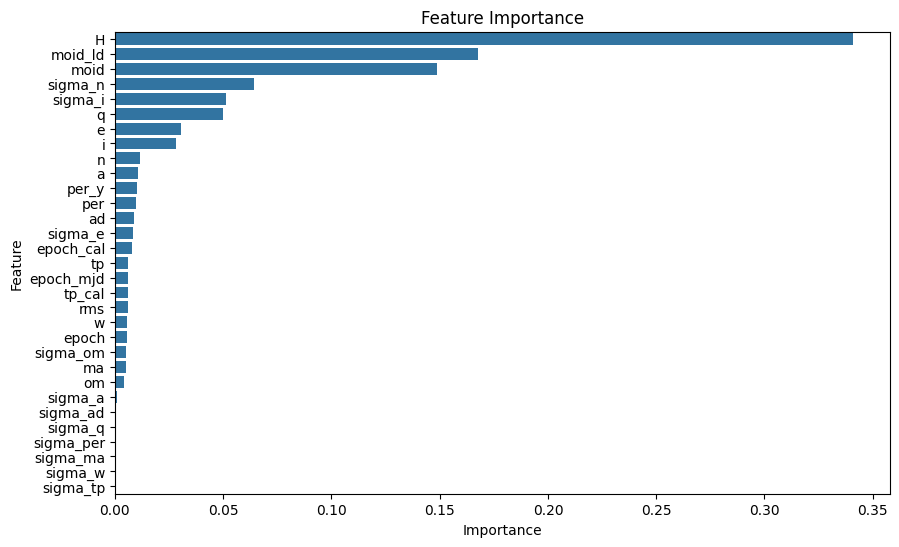

In [127]:
#Feature Importance to PHA using tree-based model - random forest
features = ['H', 'epoch', 'epoch_mjd', 'epoch_cal', 'e', 'a', 'q', 'i', 'om', 'w', 'ma', 'ad', 'n', 'tp', 'tp_cal', 'per', 'per_y', 'moid', 'moid_ld', 'sigma_e', 'sigma_a', 'sigma_q', 'sigma_i', 'sigma_om', 'sigma_w', 'sigma_ma', 'sigma_ad', 'sigma_n', 'sigma_tp', 'sigma_per', 'rms']

df.dropna(subset=features, inplace=True)

scaler = StandardScaler()
X1 = scaler.fit_transform(df[features])
y1 = df['pha']

model1 = RandomForestClassifier(n_estimators=100, random_state=42)
model1.fit(X1, y1)

importances = model1.feature_importances_
print("Feature importances:", importances)

feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.sort_values(by='Importance', ascending=False))
plt.title('Feature Importance')
plt.show()

## 5 Hypothesis

### 1. PHA Status and Absolute Magnitude (H):
Asteroids marked as Potentially Hazardous Asteroids (PHAs) have lower absolute magnitude (H) values.

C:\Users\MSI-NB\AppData\Local\Temp\ipykernel_16284\2474094976.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='pha', y='H', data=df, palette='Set2')


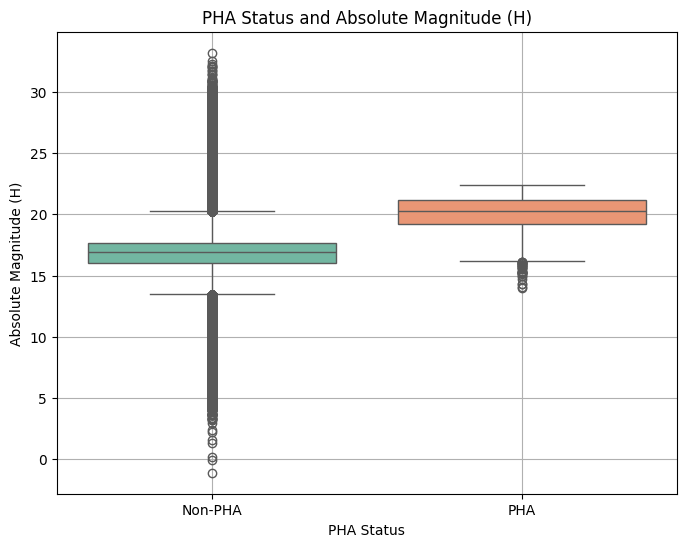

In [27]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='pha', y='H', data=df, palette='Set2')
plt.title('PHA Status and Absolute Magnitude (H)')
plt.xlabel('PHA Status')
plt.ylabel('Absolute Magnitude (H)')
plt.xticks([0, 1], ['Non-PHA', 'PHA'])
plt.grid(True)
plt.show()

### 2. NEO Status and Perihelion Distance (q):
A smaller perihelion distance increases the chance of an encounter with Earth.

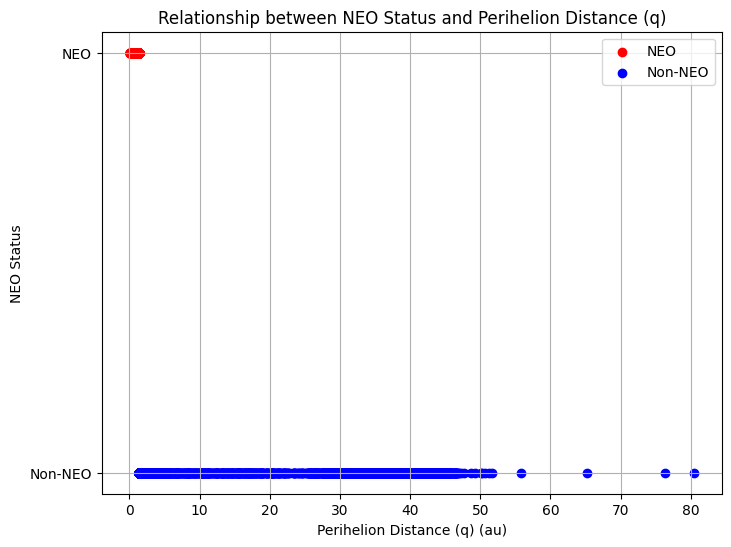

In [25]:
plt.figure(figsize=(8, 6))
plt.scatter(df['q'][df['neo'] == True], df['neo'][df['neo'] == True], color='red', label='NEO')  
plt.scatter(df['q'][df['neo'] == False], df['neo'][df['neo'] == False], color='blue', label='Non-NEO')  
plt.title('Relationship between NEO Status and Perihelion Distance (q)')
plt.xlabel('Perihelion Distance (q) (au)')
plt.yticks([0, 1], ['Non-NEO', 'NEO'])
plt.ylabel('NEO Status')
plt.legend()
plt.grid(True)
plt.show()

### 3. Minimum Orbit Intersection Distance (moid_ld) and PHA Status:
Asteroids with smaller minimum orbit intersection distance (moid_ld) are more likely to be classified as PHAs.

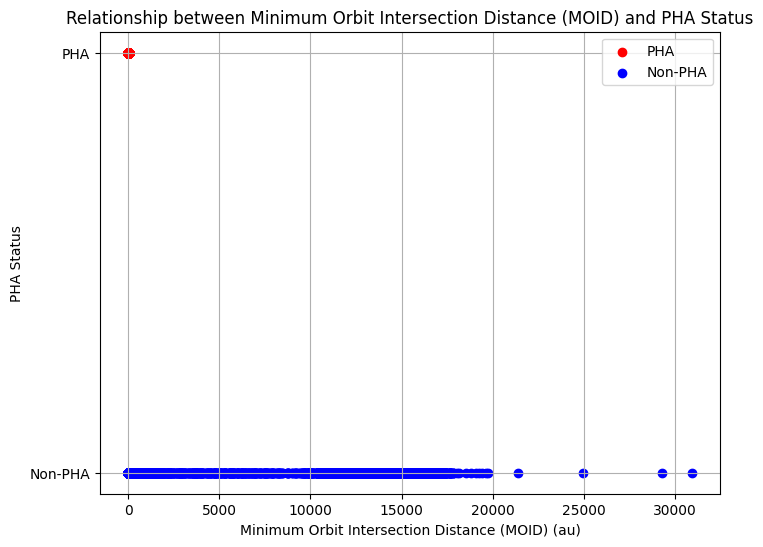

In [26]:
plt.figure(figsize=(8, 6))
plt.scatter(df['moid_ld'][df['pha'] == True], df['pha'][df['pha'] == True], color='red', label='PHA')  
plt.scatter(df['moid_ld'][df['pha'] == False], df['pha'][df['pha'] == False], color='blue', label='Non-PHA')  
plt.title('Relationship between Minimum Orbit Intersection Distance (MOID) and PHA Status')
plt.xlabel('Minimum Orbit Intersection Distance (MOID) (au)')
plt.yticks([0, 1], ['Non-PHA', 'PHA'])
plt.ylabel('PHA Status')
plt.legend()
plt.grid(True)
plt.show()

### 4. Eccentricity (e) and NEO Status:
Near-Earth Objects (NEOs) have higher eccentricity.

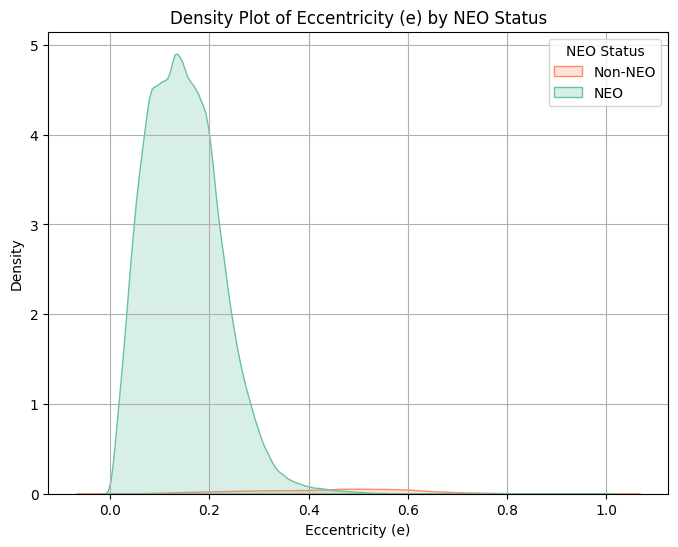

In [28]:
plt.figure(figsize=(8, 6))
sns.kdeplot(data=df, x='e', hue='neo', fill=True, palette='Set2')
plt.title('Density Plot of Eccentricity (e) by NEO Status')
plt.xlabel('Eccentricity (e)')
plt.ylabel('Density')
plt.legend(title='NEO Status', labels=['Non-NEO', 'NEO'])
plt.grid(True)
plt.show()

### 5. Orbital Inclination (i) and NEO Status:
Near-Earth Objects (NEOs) have lower orbital inclination (i).

C:\Users\MSI-NB\AppData\Local\Temp\ipykernel_16284\1129117644.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='neo', y='i', data=df, palette='Set2')


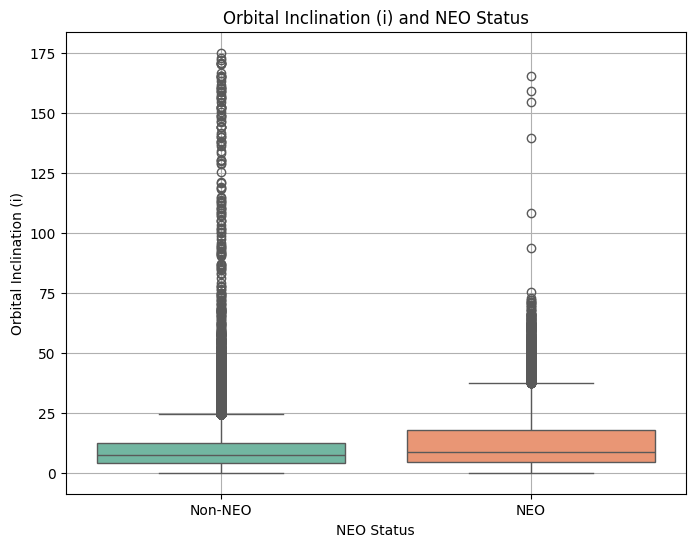

In [29]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='neo', y='i', data=df, palette='Set2')
plt.title('Orbital Inclination (i) and NEO Status')
plt.xlabel('NEO Status')
plt.ylabel('Orbital Inclination (i)')
plt.xticks([0, 1], ['Non-NEO', 'NEO'])
plt.grid(True)
plt.show()

## Heatmap

In [28]:
corr_matrix = df[['H', 'e', 'a', 'q', 'i', 'moid_ld', 'pha', 'neo']].corr()

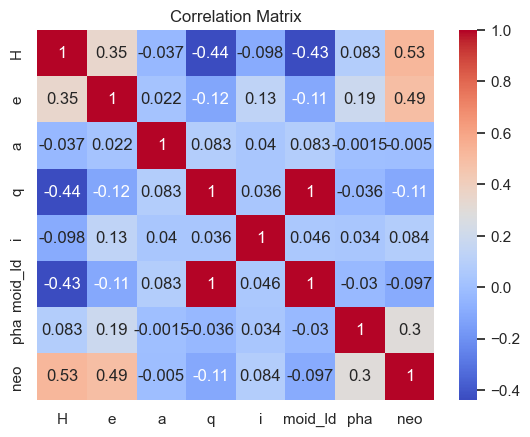

In [29]:
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [99]:
corr_matrix = df[['H', 'epoch', 'epoch_mjd', 'epoch_cal', 'e', 'a', 'q', 'i', 'om', 'w', 'ma', 'ad', 'n', 'tp', 'tp_cal', 'per', 'per_y', 'moid', 'moid_ld', 'sigma_e', 'sigma_a', 'sigma_q', 'sigma_i', 'sigma_om', 'sigma_w', 'sigma_ma', 'sigma_ad', 'sigma_n', 'sigma_tp', 'sigma_per', 'rms', 'pha', 'neo']].corr()

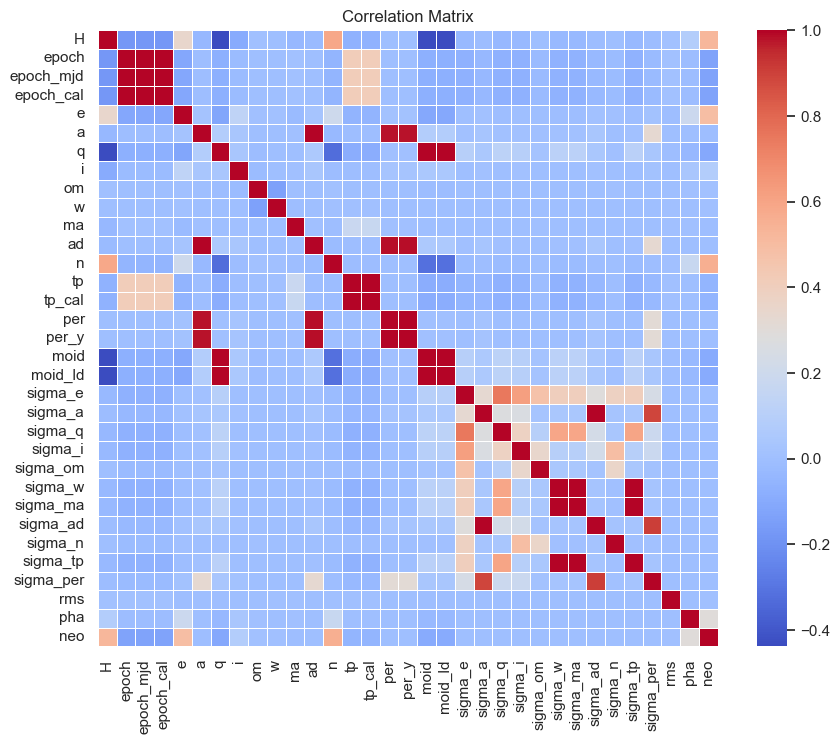

In [100]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# 4. Data Preprocessing

## Normalization

In [20]:
type(df)

pandas.core.frame.DataFrame

In [21]:
df_model_data  = np.array(df[['H', 'e', 'a', 'q', 'i', 'moid_ld']])
df_target_data  = np.array(df[['neo', 'pha']])

In [22]:
df_max = df_model_data[:, 0].max()
df_min = df_model_data[:, 0].min()

In [23]:
df_model_data

array([[3.40000000e+00, 7.60090266e-02, 2.76916515e+00, 2.55868360e+00,
        1.05940672e+01, 6.20640533e+02],
       [4.20000000e+00, 2.29972259e-01, 2.77384143e+00, 2.13593485e+00,
        3.48329316e+01, 4.80348639e+02],
       [5.33000000e+00, 2.56936435e-01, 2.66828529e+00, 1.98270558e+00,
        1.29910435e+01, 4.02514639e+02],
       ...,
       [2.04000000e+01, 6.62446098e-01, 2.81715181e+00, 9.50940588e-01,
        4.67927786e+00, 1.38500933e+01],
       [1.80710000e+01, 2.02052803e-01, 2.37313690e+00, 1.89363794e+00,
        7.32483768e-01, 3.47877506e+02],
       [1.80600000e+01, 2.58348234e-01, 2.26040449e+00, 1.67643298e+00,
        9.66194660e+00, 2.64721217e+02]])

In [24]:
def df_to_original_space(x: np.array):
    return (x*(df_max - df_min)+df_min)
df_model_data_norm = (df_model_data - df_model_data.min(0)) / (df_model_data.max(0) - df_model_data.min(0))
print(df_model_data.shape)

(932335, 6)


In [25]:
df_model_data.min(0)

array([-1.10000000e+00,  3.13367086e-06,  5.55417849e-01,  7.05107320e-02,
        7.74421982e-03,  1.76843518e-04])

In [26]:
df_model_data_norm.max(0)

array([1., 1., 1., 1., 1., 1.])

In [27]:
df_model_data_norm.min(0)

array([0., 0., 0., 0., 0., 0.])

## UnderSampling

In [28]:
from imblearn.under_sampling import RandomUnderSampler

In [29]:
merged_data = np.concatenate((df_model_data_norm, df_target_data), axis=1)
print("Merged data shape:", merged_data.shape)

Merged data shape: (932335, 8)


In [30]:
X = merged_data[:, :-2]
y_neo = merged_data[:, -2]
y_pha = merged_data[:, -1]

In [31]:
print("y_neo dtype:", y_neo.dtype)
print("y_neo unique values:", np.unique(y_neo))
print("y_pha dtype:", y_pha.dtype)
print("y_pha unique values:", np.unique(y_pha))

y_neo dtype: float64
y_neo unique values: [0. 1.]
y_pha dtype: float64
y_pha unique values: [0. 1.]


In [32]:
undersampler = RandomUnderSampler(random_state=42)
X_res_neo, y_res_neo = undersampler.fit_resample(X, y_neo)
X_res_pha, y_res_pha = undersampler.fit_resample(X, y_pha)

In [33]:
print("Neo: Original shape {}, Resampled shape {}".format(X.shape, X_res_neo.shape))
print("Pha: Original shape {}, Resampled shape {}".format(X.shape, X_res_pha.shape))

Neo: Original shape (932335, 6), Resampled shape (45766, 6)
Neo: Original shape (932335, 6), Resampled shape (4132, 6)


In [34]:
unique_neo, counts_neo = np.unique(y_res_neo, return_counts=True)
print("Neo:")
for value, count in zip(unique_neo, counts_neo):
    print(f"Value: {value}, Count: {count}, Frequency: {count / len(y_res_neo)}")

Neo:
Value: 0.0, Count: 22883, Frequency: 0.5
Value: 1.0, Count: 22883, Frequency: 0.5


In [35]:
unique_pha, counts_pha = np.unique(y_res_pha, return_counts=True)
print("Pha:")
for value, count in zip(unique_pha, counts_pha):
    print(f"Value: {value}, Count: {count}, Frequency: {count / len(y_res_neo)}")

Pha:
Value: 0.0, Count: 2066, Frequency: 0.045142682340602196
Value: 1.0, Count: 2066, Frequency: 0.045142682340602196


# 5. Correlation Analysis

### Data Filtering and MIC Calculation for NEO and PHA with Other Variables
MIC Ranges:\
0.0 - 0.1: Almost no correlation or extremely weak correlation.\
0.1 - 0.3: Weak correlation.\
0.3 - 0.5: Moderate correlation.\
0.5 - 0.7: Strong correlation.\
0.7 - 1.0: Very strong correlation.

In [36]:
from minepy import MINE
mine = MINE()
NEO = y_res_neo;
mic_list_neo = []

for i in range(0, X_res_neo.shape[1]):
    mine.compute_score(NEO, X_res_neo[:, i])
    mic = mine.mic()
    mic_list_neo.append(mic)
print(len(mic_list_neo))

6


In [37]:
mic_list_neo

[0.7787484304780398,
 0.5921628844449925,
 0.5786543378939402,
 1.0000000000000002,
 0.08442092311829444,
 1.0000000000000002]

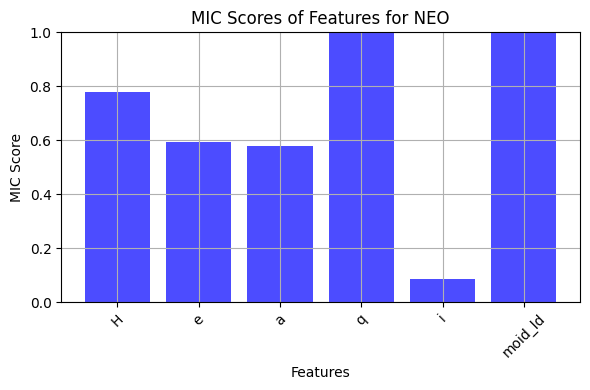

In [38]:
features = ['H', 'e', 'a', 'q', 'i', 'moid_ld']

plt.figure(figsize=(6, 4))
plt.bar(features, mic_list_neo, color='blue', alpha=0.7)
plt.title('MIC Scores of Features for NEO')
plt.xlabel('Features')
plt.ylabel('MIC Score')
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.grid(True)
plt.tight_layout()

plt.show()

In [39]:
from minepy import MINE
mine = MINE()
PHA = y_res_pha;
mic_list_pha = []

for i in range(0, X_res_pha.shape[1]):
    mine.compute_score(PHA, X_res_pha[:, i])
    mic = mine.mic()
    mic_list_pha.append(mic)
print(len(mic_list_pha))

6


In [40]:
mic_list_pha

[0.6465836327633202,
 0.7243135215827805,
 0.5700375490260432,
 0.9999999999999989,
 0.13558765584860294,
 0.9999999999999989]

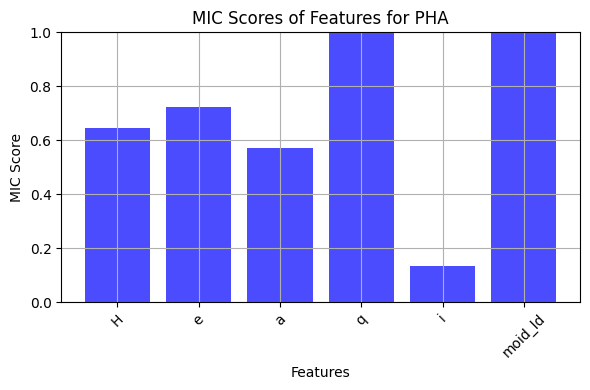

In [41]:
features = ['H', 'e', 'a', 'q', 'i', 'moid_ld']

plt.figure(figsize=(6, 4))
plt.bar(features, mic_list_pha, color='blue', alpha=0.7)
plt.title('MIC Scores of Features for PHA')
plt.xlabel('Features')
plt.ylabel('MIC Score')
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.grid(True)
plt.tight_layout()

plt.show()

# 6. Model Training and Evaluation

## NEO

### Divide the training and testing sets

In [42]:
#Divide the training and testing sets for NEO
x = X_res_neo[:,[mic > 0.3 for mic in mic_list_neo]][:,:]
y = y_res_neo
print(f'Modeling Data Dimensions x:{x.shape} y:{y.shape}')

len_train = 30750
len_test = 10250
x_train_val = x[0:len_train]
y_train_val = y[0:len_train]
x_test = x[len_train:len_train+len_test]
y_test = y[len_train:len_train+len_test]
print(x_train_val.shape, x_test.shape)
print(y_train_val.shape, y_test.shape)

Modeling Data Dimensions x:(45766, 5) y:(45766,)
(30750, 5) (10250, 5)
(30750,) (10250,)


### PSO-SVC
Penalty Factor C: 0-1000\
Insensitivity Parameter epsilon: 0.001-1\
Radial Basis Kernel Parameter gamma: 0.01-1

Implement an optimization algorithm called Adaptive Discrete Quantum Particle Swarm Optimization (ADQPSO) to find the best parameters (C and gamma)\
for a Support Vector Classifier (SVC) using 5-fold cross-validation. 

In [43]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

class Particle:
    # Initialize particle with random position within bounds
    def __init__(self, bounds):
        self.position = np.random.uniform(bounds[:, 0], bounds[:, 1])
        self.pbest_position = self.position.copy()
        self.pbest_value = -float('inf')  # For maximization, start with -inf
        self.velocity = np.random.uniform(-1, 1, bounds.shape[0])
        
    def update_velocity(self, gbest_position, c1, c2, w):
         # Update particle's velocity based on cognitive and social components
        r1 = np.random.random(self.velocity.shape)
        r2 = np.random.random(self.velocity.shape)
        cognitive_velocity = c1 * r1 * (self.pbest_position - self.position)
        social_velocity = c2 * r2 * (gbest_position - self.position)
        self.velocity = w * self.velocity + cognitive_velocity + social_velocity
        
    def update_position(self, bounds):
        # Update particle's position and ensure it stays within bounds
        self.position += self.velocity
        self.position = np.clip(self.position, bounds[:, 0], bounds[:, 1])

class ADQPSO:
    def __init__(self, objective_function, bounds, num_particles, max_iter):
        # Initialize ADQPSO optimizer
        self.objective_function = objective_function
        self.bounds = bounds
        self.num_particles = num_particles
        self.max_iter = max_iter
        self.swarm = [Particle(bounds) for _ in range(num_particles)]
        self.gbest_position = None
        self.gbest_value = -float('inf')  # For maximization
        
    def optimize(self):
        # Optimize using ADQPSO algorithm
        for iteration in range(self.max_iter):
            for particle in self.swarm:
                fitness_candidate = self.objective_function(particle.position)
                if fitness_candidate > particle.pbest_value:  # For maximization
                    particle.pbest_value = fitness_candidate
                    particle.pbest_position = particle.position.copy()
                
                if fitness_candidate > self.gbest_value:  # For maximization
                    self.gbest_value = fitness_candidate
                    self.gbest_position = particle.position.copy()
            
            # Update parameters for next iteration
            w = 0.5 + np.random.random() / 2
            c1 = 2.5 - 2 * (iteration / self.max_iter)
            c2 = 0.5 + 2 * (iteration / self.max_iter)
            
            # Update velocities and positions of all particles
            for particle in self.swarm:
                particle.update_velocity(self.gbest_position, c1, c2, w)
                particle.update_position(self.bounds)
            
            # Print current iteration's results
            print(f"Iteration: {iteration + 1}, Best Value: {self.gbest_value}")
        
        return self.gbest_position, self.gbest_value


class KFold:
    def __init__(self, n_splits=5, shuffle=False, random_state=None):
        # Initialize KFold cross-validator
        self.n_splits = n_splits
        self.shuffle = shuffle
        self.random_state = random_state
    
    def split(self, X):
        # Generate indices to split data into training and validation sets
        n_samples = len(X)
        indices = np.arange(n_samples)
        
        if self.shuffle:
            if self.random_state is not None:
                np.random.seed(self.random_state)
            np.random.shuffle(indices)
        
        fold_sizes = np.full(shape=self.n_splits, fill_value=n_samples // self.n_splits, dtype=int)
        
        for i in range(n_samples % self.n_splits):
            fold_sizes[i] += 1
        current = 0
        # Yield indices for training and validation sets
        for fold_size in fold_sizes: 
            start, stop = current, current + fold_size
            yield np.concatenate([indices[:start],indices[stop:]]), indices[start:stop]
            current = stop

def objective_function(x: np.array):
    C = x[0]
    gamma = x[1]
     # Objective function to optimize SVC parameters using 5-fold cross-validation
    accuracy_list = []
    for train_index, val_index in kf.split(x_train_val):
        # Split data into training and validation sets
        x_train, x_val = x_train_val[train_index], x_train_val[val_index]
        y_train, y_val = y_train_val[train_index].reshape(-1), y_train_val[val_index].reshape(-1)   
        # Fit SVC model and compute accuracy on validation set
        model = SVC(kernel='rbf', C=C, gamma=gamma)
        model.fit(x_train, y_train)
        y_pred = model.predict(x_val)
        accuracy = accuracy_score(y_val, y_pred)
        accuracy_list.append(accuracy)
    # Calculate mean accuracy across folds
    mean_accuracy = np.mean(accuracy_list)
    return mean_accuracy

# Initialize KFold cross-validator and search space bounds for SVC parameters
kf = KFold(n_splits=5, shuffle=True, random_state=1)
bounds = np.array([[0.0001, 100], [0.001, 10]])  # 2-dimensional search space for SVC
num_particles = 30
max_iter = 1
# Initialize and run ADQPSO optimizer
optimizer = ADQPSO(objective_function, bounds, num_particles, max_iter)
best_position, best_value = optimizer.optimize()
# Print best parameters found by ADQPSO optimizer
print(f"Best Position: {best_position}, Best Value: {best_value}")

Iteration: 1, Best Value: 0.9979837398373984
Best Position: [79.68211731  8.72874957], Best Value: 0.9979837398373984


Iteration: 1, Best Position: [79.68211731  8.72874957], Best Value: 0.9979837398373984

### Performance Evaluation

In [45]:
from sklearn.metrics import accuracy_score, f1_score, classification_report

# Use the best parameters obtained from optimization
best_C = best_position[0]
best_gamma = best_position[1]

# Create a Support Vector Classifier (SVC) model with the best parameters
model = SVC(kernel='rbf', C=best_C, gamma=best_gamma, random_state=42)
model.fit(x_train_val, y_train_val)

# Predict using the trained model on the test set
y_test_pred = model.predict(x_test)

# Calculate and print evaluation metrics
accuracy = accuracy_score(y_test, y_test_pred) # Calculate accuracy
f1 = f1_score(y_test, y_test_pred, average='weighted')  # Calculate F1 score (weighted)
classification_rep = classification_report(y_test, y_test_pred) # Generate classification report

# Print the evaluation results
print(f'Accuracy on test set: {accuracy:.4f}')
print(f'F1 Score on test set: {f1:.4f}')
print('Classification Report on test set:')
print(classification_rep)

Accuracy on test set: 1.0000
F1 Score on test set: 1.0000
Classification Report on test set:
              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00     10250

    accuracy                           1.00     10250
   macro avg       1.00      1.00      1.00     10250
weighted avg       1.00      1.00      1.00     10250



### Overfitting
Possibly due to splitting the dataset after sampling processing\
Reset the test set and re-evaluate

In [46]:
from sklearn.model_selection import train_test_split

In [49]:
merged_data = np.delete(merged_data, 4, axis=1)

In [50]:
# Sample 10,250 rows from merged_data
np.random.seed(42)  # for reproducibility
indices = np.random.choice(merged_data.shape[0], size=10250, replace=False)
df_model_data_sample = merged_data[indices]

# Separate features (X_test_new) and target (y_test_new)
X_test_new = df_model_data_sample[:, :-2]  # Assuming last two columns are 'neo' and 'pha'
y_test_new = df_model_data_sample[:, -2]   # 'neo' column as target (change to -1 if 'pha' is the target)

# Re-train the model with best parameters
model = SVC(kernel='rbf', C=best_C, gamma=best_gamma, random_state=42)
model.fit(x_train_val, y_train_val)

# Predict on the new test set
y_test_pred_new = model.predict(X_test_new)

# Evaluate performance
accuracy_new = accuracy_score(y_test_new, y_test_pred_new)
f1_new = f1_score(y_test_new, y_test_pred_new, average='weighted')
classification_rep_new = classification_report(y_test_new, y_test_pred_new)

# Print evaluation metrics
print(f'Accuracy on new test set: {accuracy_new:.4f}')
print(f'F1 Score on new test set: {f1_new:.4f}')
print('Classification Report on new test set:')
print(classification_rep_new)

Accuracy on new test set: 0.9972
F1 Score on new test set: 0.9972
Classification Report on new test set:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      9994
         1.0       0.90      1.00      0.95       256

    accuracy                           1.00     10250
   macro avg       0.95      1.00      0.97     10250
weighted avg       1.00      1.00      1.00     10250



### Visualization

#### Confusion Matrix

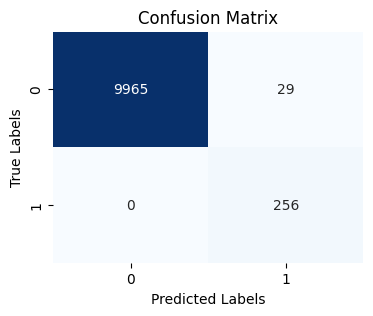

In [52]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test_new, y_test_pred_new)

plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

#### ROC Curve

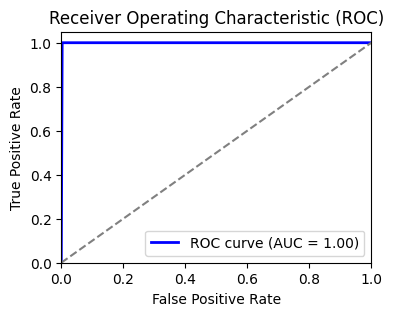

In [54]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test_new, y_test_pred_new)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(4, 3))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

#### Precision-Recall Curve

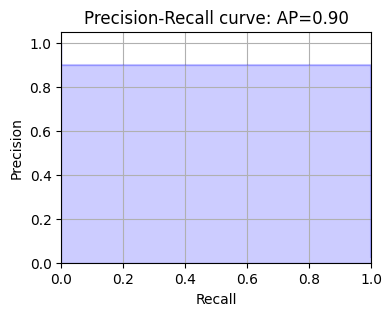

In [56]:
from sklearn.metrics import precision_recall_curve, average_precision_score

precision, recall, _ = precision_recall_curve(y_test_new, y_test_pred_new)
average_precision = average_precision_score(y_test_new, y_test_pred_new)

plt.figure(figsize=(4, 3))
plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall curve: AP={0:0.2f}'.format(average_precision))
plt.grid(True)
plt.show()

#### Precision, Recall, and F1 Score Comparison Chart

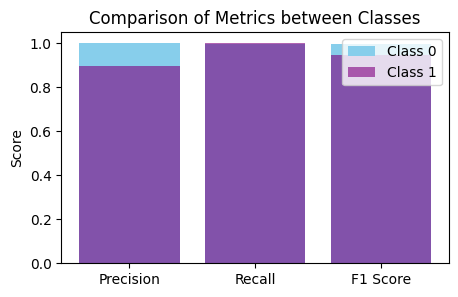

In [58]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision_0 = precision_score(y_test_new, y_test_pred_new, pos_label=0)
recall_0 = recall_score(y_test_new, y_test_pred_new, pos_label=0)
f1_0 = f1_score(y_test_new, y_test_pred_new, pos_label=0)

precision_1 = precision_score(y_test_new, y_test_pred_new, pos_label=1)
recall_1 = recall_score(y_test_new, y_test_pred_new, pos_label=1)
f1_1 = f1_score(y_test_new, y_test_pred_new, pos_label=1)

plt.figure(figsize=(5, 3))
plt.bar(['Precision', 'Recall', 'F1 Score'], [precision_0, recall_0, f1_0], label='Class 0', color='skyblue')
plt.bar(['Precision', 'Recall', 'F1 Score'], [precision_1, recall_1, f1_1], label='Class 1', color='purple', alpha=0.6)
plt.title('Comparison of Metrics between Classes')
plt.ylabel('Score')
plt.legend()
plt.show()

## PHA

In [59]:
x = X_res_pha[:,[mic > 0.3 for mic in mic_list_neo]][:,:]
y = y_res_pha
print(f'Modeling Data Dimensions x:{x.shape} y:{y.shape}')

len_train = 3075
len_test = 1025
x_train_val = x[0:len_train]
y_train_val = y[0:len_train]
x_test = x[len_train:len_train+len_test]
y_test = y[len_train:len_train+len_test]
print(x_train_val.shape, x_test.shape)
print(y_train_val.shape, y_test.shape)

Modeling Data Dimensions x:(4132, 5) y:(4132,)
(3075, 5) (1025, 5)
(3075,) (1025,)


In [60]:
kf = KFold(n_splits=5, shuffle=True, random_state=1)
bounds = np.array([[0.0001, 100], [0.001, 10]])  # 2-dimensional search space for SVC
num_particles = 30
max_iter = 1
optimizer = ADQPSO(objective_function, bounds, num_particles, max_iter)
best_position, best_value = optimizer.optimize()
print(f"Best Position: {best_position}, Best Value: {best_value}")

Iteration: 1, Best Value: 0.9915447154471545
Best Position: [67.95073504  3.59579729], Best Value: 0.9915447154471545


Best Position: [67.95073504  3.59579729], Best Value: 0.9915447154471545

In [61]:
best_C = best_position[0]
best_gamma = best_position[1]

model = SVC(kernel='rbf', C=best_C, gamma=best_gamma, random_state=42)
model.fit(x_train_val, y_train_val)

y_test_pred = model.predict(x_test)

accuracy = accuracy_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred, average='weighted') 
classification_rep = classification_report(y_test, y_test_pred)

print(f'Accuracy on test set: {accuracy:.4f}')
print(f'F1 Score on test set: {f1:.4f}')
print('Classification Report on test set:')
print(classification_rep)

Accuracy on test set: 1.0000
F1 Score on test set: 1.0000
Classification Report on test set:
              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00      1025

    accuracy                           1.00      1025
   macro avg       1.00      1.00      1.00      1025
weighted avg       1.00      1.00      1.00      1025



In [62]:
# Sample 10,25 rows from merged_data
np.random.seed(42)  # for reproducibility
indices = np.random.choice(merged_data.shape[0], size=1025, replace=False)
df_model_data_sample = merged_data[indices]

# Separate features (X_test_new) and target (y_test_new)
X_test_new = df_model_data_sample[:, :-2]  # Assuming last two columns are 'neo' and 'pha'
y_test_new = df_model_data_sample[:, -2]   # 'neo' column as target (change to -1 if 'pha' is the target)

# Re-train the model with best parameters
model = SVC(kernel='rbf', C=best_C, gamma=best_gamma, random_state=42)
model.fit(x_train_val, y_train_val)

# Predict on the new test set
y_test_pred_new = model.predict(X_test_new)

# Evaluate performance
accuracy_new = accuracy_score(y_test_new, y_test_pred_new)
f1_new = f1_score(y_test_new, y_test_pred_new, average='weighted')
classification_rep_new = classification_report(y_test_new, y_test_pred_new)

# Print evaluation metrics
print(f'Accuracy on new test set: {accuracy_new:.4f}')
print(f'F1 Score on new test set: {f1_new:.4f}')
print('Classification Report on new test set:')
print(classification_rep_new)

Accuracy on new test set: 0.9873
F1 Score on new test set: 0.9862
Classification Report on new test set:
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99       996
         1.0       0.90      0.62      0.73        29

    accuracy                           0.99      1025
   macro avg       0.94      0.81      0.86      1025
weighted avg       0.99      0.99      0.99      1025



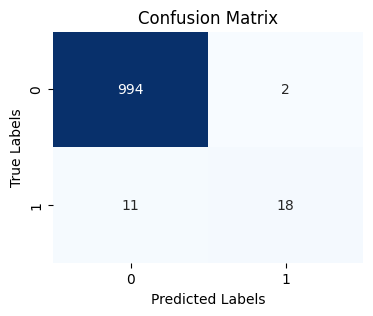

In [63]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test_new, y_test_pred_new)

plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

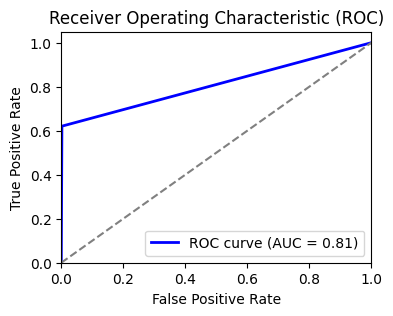

In [64]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test_new, y_test_pred_new)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(4, 3))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

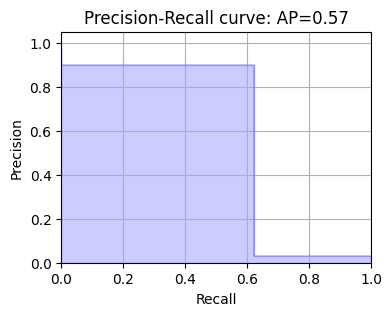

In [65]:
from sklearn.metrics import precision_recall_curve, average_precision_score

precision, recall, _ = precision_recall_curve(y_test_new, y_test_pred_new)
average_precision = average_precision_score(y_test_new, y_test_pred_new)

plt.figure(figsize=(4, 3))
plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall curve: AP={0:0.2f}'.format(average_precision))
plt.grid(True)
plt.show()

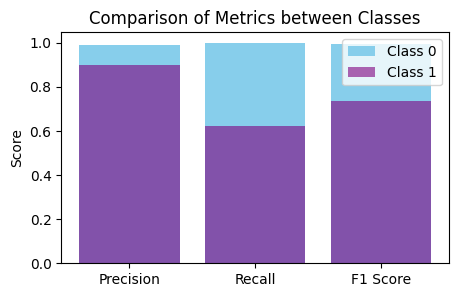

In [66]:
precision_0 = precision_score(y_test_new, y_test_pred_new, pos_label=0)
recall_0 = recall_score(y_test_new, y_test_pred_new, pos_label=0)
f1_0 = f1_score(y_test_new, y_test_pred_new, pos_label=0)

precision_1 = precision_score(y_test_new, y_test_pred_new, pos_label=1)
recall_1 = recall_score(y_test_new, y_test_pred_new, pos_label=1)
f1_1 = f1_score(y_test_new, y_test_pred_new, pos_label=1)

plt.figure(figsize=(5, 3))
plt.bar(['Precision', 'Recall', 'F1 Score'], [precision_0, recall_0, f1_0], label='Class 0', color='skyblue')
plt.bar(['Precision', 'Recall', 'F1 Score'], [precision_1, recall_1, f1_1], label='Class 1', color='purple', alpha=0.6)
plt.title('Comparison of Metrics between Classes')
plt.ylabel('Score')
plt.legend()
plt.show()